In [26]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [27]:
# Menentukan Variabel Kasus
#Sensor Kelembaban
Kelembaban = np.arange(0, 120, 1)

#Sensor Cahaya
Cahaya = np.arange(0, 120, 1)

#Sensor Suhu
Suhu = np.arange(0, 110, 1)

#Penyiraman
Penyiraman = np.arange(0, 350, 1)


In [28]:
# Menentukan Range Himpunan Fuzzy

# Sensor Kelembaban
Kelembaban_Basah = fuzz.trapmf(Kelembaban, [0, 0, 40, 80])
Kelembaban_Kering = fuzz.trapmf(Kelembaban,[40, 80, 120, 120])

#Sensor Cahaya 
Cahaya_Terang = fuzz.trapmf(Cahaya, [0, 0, 40, 80])
Cahaya_Gelap = fuzz.trapmf(Cahaya, [40, 80, 120, 120])

#Sensor Suhu
Suhu_Dingin = fuzz.trapmf(Suhu, [0, 0, 40, 70])
Suhu_Panas = fuzz.trapmf (Suhu, [40, 70, 110, 110])

#Penyiraman
Penyiraman_Tidak = fuzz.trapmf (Penyiraman, [0, 0, 50, 300])
Penyiraman_Iya = fuzz.trapmf (Penyiraman, [50, 300, 350, 350])

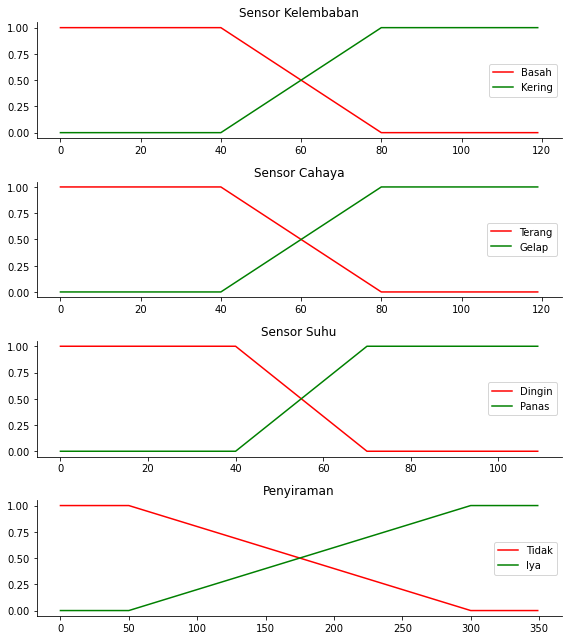

In [29]:
# Membuat Grafik Himpunan Fuzzy
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8,9))

ax0.plot(Kelembaban, Kelembaban_Basah, 'r', linewidth=1.5, label='Basah')
ax0.plot(Kelembaban, Kelembaban_Kering, 'g', linewidth=1.5, label='Kering')

ax0.set_title('Sensor Kelembaban')
ax0.legend()

ax1.plot(Cahaya, Cahaya_Terang, 'r', linewidth=1.5, label='Terang')
ax1.plot(Cahaya,Cahaya_Gelap, 'g', linewidth=1.5, label='Gelap')

ax1.set_title('Sensor Cahaya')
ax1.legend()

ax2.plot(Suhu_Dingin, 'r', linewidth=1.5, label='Dingin')
ax2.plot(Suhu_Panas, 'g', linewidth=1.5, label='Panas')

ax2.set_title('Sensor Suhu')
ax2.legend()

ax3.plot(Penyiraman,Penyiraman_Tidak, 'r', linewidth=1.5, label='Tidak')
ax3.plot(Penyiraman,Penyiraman_Iya , 'g', linewidth=1.5, label='Iya')

ax3.set_title('Penyiraman')
ax3.legend()

for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()

In [30]:
# Menentukan Rule Base
"""
•R1, Jika kelembaban tanah basah, cahaya terang DAN suhu panas  maka alat tidak akan menyiram 
•R2, Jika kelembaban tanah basah, cahaya terang DAN suhu dingin maka alat tidak akan menyiram 
•R3, Jika kelembaban tanah basah, cahaya gelap DAN  suhu panas maka alat tidak akan menyiram 
•R4, Jika kelembaban tanah basah, cahaya gelap DAN  suhu dingin maka alat tidak akan menyiram 
•R5, JJika kelembaban tanah kering, cahaya terang DAN suhu panas maka alat akan menyiram 
•R6, JJika kelembaban tanah kering, cahaya terang DAN suhu dingin maka alat akan menyiram 
•R7, JJika kelembaban tanah kering, cahaya gelap DAN  suhu panas maka alat akan menyiram 
•R8, JJika kelembaban tanah kering, cahaya gelap DAN  suhu panasmaka alat akan menyiram 

Domain penyiraman:
Tidak --> (80-Z)/(80-20) = fmin; apred[i] = fmin; (80 - Z) = 60 * apred[i]; Z = 80 - (60 * apred[i])
Iya --> (Z-20)/(80-20) = fmin; apred[i] = fmin; (Z - 20) = 60 * apred[i]; Z = (60 * apred[i]) + 20
""";


In [31]:
# Mengimput Nilai Kasus
SK = 55
SC = 50
SS = 29

In [32]:
# Menentukan Derajat Keanggotaan
a = []
a.append(fuzz.interp_membership(Kelembaban, Kelembaban_Basah, SK))
a.append(fuzz.interp_membership(Kelembaban, Kelembaban_Kering, SK))

b = []
b.append(fuzz.interp_membership(Cahaya, Cahaya_Terang, SC))
b.append(fuzz.interp_membership(Cahaya,Cahaya_Gelap, SC))

c = []
c.append(fuzz.interp_membership(Suhu, Suhu_Dingin, SS))
c.append(fuzz.interp_membership(Suhu, Suhu_Panas, SS))

print("Derajat Keanggotaan Sensor Kelembaban")
if a[0] > 0:
    print("Basah: "+str(a[0]))
if a[1] > 0:
    print("Kering: "+str(a[1]))

print("Derajat Keanggotaan Sensor Cahaya")
if b[0] > 0:
    print("Terang: "+str(b[0]))
if b[1] > 0:
    print("Gelap: "+str(b[1]))

print("Derajat Keanggotaan Sensor Suhu")
if c[0] > 0:
    print("Dingin: "+str(c[0]))
if c[1] > 0:
    print("Panas: "+str(c[1]))

Derajat Keanggotaan Sensor Kelembaban
Basah: 0.625
Kering: 0.375
Derajat Keanggotaan Sensor Cahaya
Terang: 0.75
Gelap: 0.25
Derajat Keanggotaan Sensor Suhu
Dingin: 1.0


In [33]:
# Memodelkan Rule Base dan Inferensi Mamdani

x1 = np.fmin(a[0], b[0])
apred1 = np.fmin(x1, c[0])
print("Rendah, Nilai apred1 = ", apred1)
z1 = 80 - (60 * apred1)
print("Nilai z1 = ", z1)

x2 = np.fmin(a[0], b[0])
apred2 = np.fmin(x2, c[1])
print("Rendah, Nilai apred2 = ", apred2)
z2 = 80 - (60 * apred2)
print("Nilai z2 = ", z2)

x3 = np.fmin(a[0], b[1])
apred3 = np.fmin(x3, c[0])
print("Rendah, Nilai apred3 = ", apred3)
z3 = 80 - (60 * apred3)
print("Nilai z3 = ", z3)

x4 = np.fmin(a[0], b[1])
apred4 = np.fmin(x4, c[1])
print("Tinggi, Nilai apred4 = ", apred4)
z4 = (60 * apred4) + 20
print("Nilai z4 = ", z4)

x5 = np.fmin(a[1], b[0])
apred5 = np.fmin(x5, c[0])
print("Rendah, Nilai apred5 = ", apred5)
z5 = 80 - (60 * apred5)
print("Nilai z5 = ", z5)

x6 = np.fmin(a[1], b[0])
apred6 = np.fmin(x6, c[1])
print("Tinggi, Nilai apred6 = ", apred6)
z6 = (80 * apred6) + 20
print("Nilai z6 = ", z6)

x7 = np.fmin(a[1], b[1])
apred7 = np.fmin(x7, c[0])
print("Tinggi, Nilai apred7 = ", apred7)
z7 = (80 * apred7) + 20
print("Nilai z7 = ", z7)

x8 = np.fmin(a[1], b[1])
apred8 = np.fmin(x8, c[1])
print("Tinggi, Nilai apred8 = ", apred8)
z8 = (80 * apred8) + 20
print("Nilai z8 = ", z8)

Nilai_rendah=np.fmax(np.fmax(apred1, apred2), np.fmax(apred3, apred5))
Nilai_tinggi=np.fmax(np.fmax(apred4, apred6), np.fmax(apred7, apred8))
print('Penyiraman')
print('Penyiraman_Iya = ', Nilai_rendah)
print('Penyiraman_Tidak = ', Nilai_tinggi)

Rendah, Nilai apred1 =  0.625
Nilai z1 =  42.5
Rendah, Nilai apred2 =  0.0
Nilai z2 =  80.0
Rendah, Nilai apred3 =  0.25
Nilai z3 =  65.0
Tinggi, Nilai apred4 =  0.0
Nilai z4 =  20.0
Rendah, Nilai apred5 =  0.375
Nilai z5 =  57.5
Tinggi, Nilai apred6 =  0.0
Nilai z6 =  20.0
Tinggi, Nilai apred7 =  0.25
Nilai z7 =  40.0
Tinggi, Nilai apred8 =  0.0
Nilai z8 =  20.0
Penyiraman
Penyiraman_Iya =  0.625
Penyiraman_Tidak =  0.25


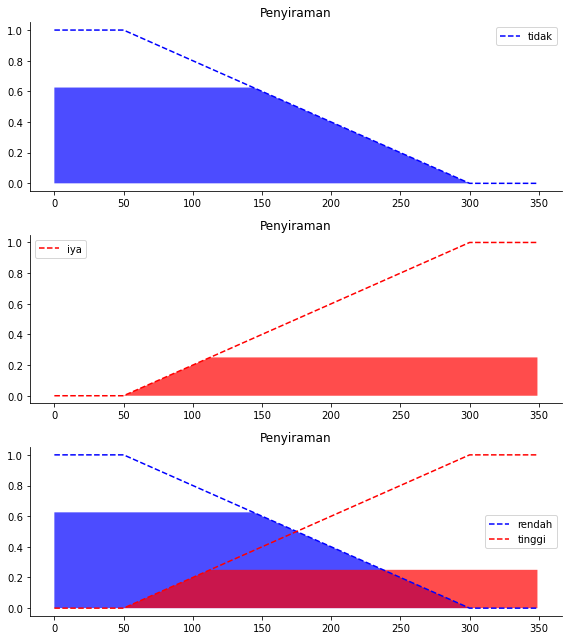

In [34]:
# Membandingkan grafik input dan output

Nilai_rendah = np.fmin(Nilai_rendah, Penyiraman_Tidak)
Nilai_tinggi = np.fmin(Nilai_tinggi, Penyiraman_Iya)

#Titik Awal Arsir
P0 = np.zeros_like(Penyiraman)
Pt = np.zeros_like(Penyiraman_Tidak)
Pi = np.zeros_like(Penyiraman_Iya)

#Visualisasi
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))

# Harga_rendah
ax0.fill_between(Penyiraman, Pt, Nilai_rendah, facecolor='b', alpha=0.7)
ax0.plot(Penyiraman, Penyiraman_Tidak, 'b', linewidth=1.5, linestyle='--', label='tidak')
ax0.set_title('Penyiraman')
ax0.legend()

ax1.fill_between(Penyiraman, Pi, Nilai_tinggi, facecolor='r', alpha=0.7)
ax1.plot(Penyiraman, Penyiraman_Iya, 'r', linewidth=1.5, linestyle='--', label='iya')
ax1.set_title('Penyiraman')
ax1.legend()

ax2.fill_between(Penyiraman, Pt, Nilai_rendah, facecolor='b', alpha=0.7)
ax2.plot(Penyiraman, Penyiraman_Tidak, 'b', linewidth=1.5, linestyle='--', label='rendah')
ax2.fill_between(Penyiraman, Pi, Nilai_tinggi, facecolor='r', alpha=0.7)
ax2.plot(Penyiraman, Penyiraman_Iya, 'r', linewidth=1.5, linestyle='--', label='tinggi')
ax2.set_title('Penyiraman')
ax2.legend()

#Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

In [35]:
#Komposisi Aturan
komposisi = np.fmax(Nilai_rendah, Nilai_tinggi)

#Hasil Defuzzifikasi
Py = fuzz.defuzz(Penyiraman, komposisi, 'centroid')
print("Penyiraman = ", Py)

#Nilai Fuzzy Untuk Membership Function
Py_defuzzy = fuzz.interp_membership(Penyiraman, komposisi, Py)
Py_defuzzy

Penyiraman =  139.70418214061846


0.625

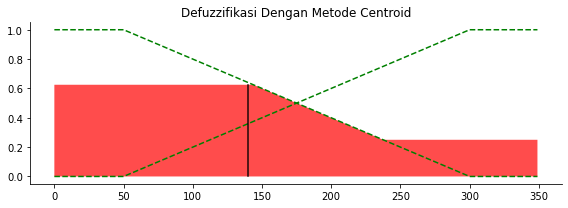

In [25]:
# Visualisasi Hasil
fig, ax0 = plt.subplots(figsize=(8,3))

ax0.plot(Penyiraman, Penyiraman_Tidak, 'g', linewidth = 1.5, linestyle='--', label = 'Tidak')
ax0.plot(Penyiraman, Penyiraman_Iya, 'g', linewidth = 1.5, linestyle='--', label = 'Tidak')
ax0.fill_between(Penyiraman, P0, komposisi, facecolor = 'Red', alpha = 0.7)
ax0.plot([Py, Py], [0, Py_defuzzy], 'k', linewidth = 1.5, alpha = 0.9)
ax0.set_title('Defuzzifikasi Dengan Metode Centroid')

#Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()